We load the libraries to be used in the experimentation

In [23]:
import numpy as np
import pandas as pd

from scipy.stats import f_oneway, ttest_ind, shapiro
import scipy.stats as ss
import scikit_posthocs as sp
import matplotlib.pyplot as plt

import os

In [24]:
PATH_FIGURES = os.path.join('..', '..', 'reports', 'plots')
path_statistical_tests = os.path.join(PATH_FIGURES, 'statistical_tests')
try:
    os.mkdir(path_statistical_tests)
except FileExistsError:
    pass

Continue loading the data of the populations to be tested:

Example using 10 independent runs (not available with all models)

In [25]:
data_arch2 = [
    # ['max', 0.8658, 0.8682, 0.8606, 0.8632, 0.8578],
    # ['avg', 0.8584, 0.8661, 0.8602, 0.8633, 0.8643],
    ['g_prod', 0.8750, 0.8714, 0.8735, 0.8738, 0.8711, 0.8753, 0.8744, 0.8727, 0.8798, 0.8789],
    ['g_ob', 0.8735, 0.8798, 0.8739, 0.8736, 0.8697, 0.872, 0.8813, 0.8758, 0.8719, 0.8762],
    # ['gp_prod_p_0_1', 0.8773, 0.8798, 0.8802, 0.8814, 0.8819],
    ['gp_prod_p_0_25', 0.8796, 0.8838, 0.8825, 0.882, 0.8784, 0.8819, 0.8821, 0.8796, 0.8828, 0.8763],
    # ['gp_prod_p_0_5', 0.8723, 0.8794, 0.8783, 0.8829, 0.8755],
    ['gp_comb_maxAndOB', 0.873, 0.8719, 0.8682, 0.8691, 0.8698, 0.8697, 0.8697, 0.8742, 0.8682, 0.8768],
    ['gp_comb_maxAndProd', 0.8821, 0.8716, 0.8789, 0.8779, 0.8716, 0.8781, 0.8688, 0.8732, 0.873, 0.8717],
    ['gp_comb_maxProdAndOB', 0.8713, 0.8762, 0.8766, 0.8744, 0.8713, 0.8714, 0.8734, 0.8739, 0.8755, 0.876],
    ['gp_comb_prodAndOB', 0.8746, 0.8799, 0.8766, 0.8766, 0.8797, 0.873, 0.8685, 0.8741, 0.873, 0.8715],
    ['gp_comp_max_prodAndOB', 0.88, 0.8735, 0.872, 0.8729, 0.8782, 0.8735, 0.8784, 0.8783, 0.8798, 0.8772],
    ['gp_comp_ob_maxandProd', 0.8732, 0.877, 0.8754, 0.8728, 0.8741, 0.8782, 0.8693, 0.8761, 0.8735, 0.8773],
    ['gp_comp_prod_maxAndOB', 0.8733, 0.8785, 0.8762, 0.8698, 0.8754, 0.8717, 0.8747, 0.8675, 0.8652, 0.8767],
    ['gp_comp_prod_maxAndProd', 0.8747, 0.8779, 0.8774, 0.875, 0.8728, 0.8753, 0.8762, 0.8759, 0.8788, 0.8764],
    ['gp_comp_prod_prodAndOB', 0.8741, 0.874, 0.879, 0.8756, 0.8749, 0.8695, 0.8763, 0.876, 0.8802, 0.8756]
]

data_values = [values[1:] for values in data_arch2]
df = pd.DataFrame(data=data_arch2, columns=['Model', 'Test1', 'Test2', 'Test3', 'Test4', 'Test5', 'Test6', 'Test7', 'Test8', 'Test9', 'Test10'])
df = df.set_index('Model')
print(len(data_values[0]))

10


## Architecture 1: LeNet-5

Sample of 5 independent tests:

In [38]:
data_arch1 = [
    [r'$AM$', 0.7487, 0.7580, 0.7562, 0.7452, 0.7562],
    [r'$G_{max}^{a,b}$', 0.7415, 0.7421, 0.7396, 0.7423, 0.7420],
    [r'$G_{prod}^{a,b}$', 0.7554, 0.7577, 0.7470, 0.7535, 0.7515],
    [r'$G_{ob}$', 0.7559, 0.7583, 0.7497, 0.7582, 0.7552],
    [r'$G_{geom}$', 0.7486, 0.7563, 0.7580, 0.7544, 0.7535],
    [r'$G_{u}$', 0.7407, 0.7451, 0.7416, 0.7491, 0.7439],
    
    [r'$AW_{(G_{prod}^{a, b}, G_{ob}^{a, b})}^{a, b}$', 0.7561, 0.7587, 0.7558, 0.7572, 0.7535],
    [r'$AW_{(G_{max}^{a, b}, G_{prod}^{a, b})}^{a, b}$', 0.7486, 0.7528, 0.7468, 0.7496, 0.7509],
    [r'$AW_{(G_{max}^{a, b}, G_{ob}^{a, b})}^{a, b}$', 0.7462, 0.7435, 0.7409, 0.7568, 0.7414],
    [r'$AW_{(G_{max}^{a, b}, G_{ob}^{a, b}, G_{prod}^{a, b})}^{a, b}$', 0.7523, 0.7551, 0.755, 0.7548, 0.7537],
    
    [r'$G_{max_{(G_{prod}^{a, b}, G_{ob}^{a, b})}}^{a, b}$', 0.755, 0.7558, 0.7585, 0.7542, 0.7622],
    [r'$G_{prod_{(G_{max}^{a, b}, G_{prod}^{a, b})}}^{a, b}$', 0.7579, 0.7581, 0.7535, 0.7605, 0.7565],
    [r'$G_{prod_{(G_{max}^{a, b}, G_{ob}^{a, b})}}^{a, b}$', 0.7496, 0.7516, 0.7511, 0.7462, 0.758],
    [r'$G_{prod_{(G_{prod}^{a, b}, G_{ob}^{a, b})}}^{a, b}$', 0.7583, 0.7515, 0.7448, 0.7546, 0.7533],
    [r'$G_{ob_{(G_{max}^{a, b}, G_{prod}^{a, b})}}^{a, b}$', 0.7607, 0.7488, 0.7538, 0.7517, 0.7556],

    [r'$G_{max}^{* a, b}$', 0.7360, 0.7357, 0.7414, 0.7303, 0.7387],
    [r'$G_{prod}^{* a, b}$', 0.7557, 0.7548, 0.7588, 0.7573, 0.7506],
    [r'$G_{geom}^{* a, b}$', 0.7534, 0.7466, 0.7605, 0.6547, 0.7502],

    [r'$AW_{(Avg, G_{max}^{a, b})}^{a, b}$', 0.7573, 0.7549, 0.7567, 0.7661, 0.7594],
    [r'$AW_{(Avg, G_{ob}^{a, b})}^{a, b}$', 0.7674, 0.7591, 0.7628, 0.7670, 0.7630],
    [r'$AW_{(Avg, G_{prod}^{a, b})}^{a, b}$', 0.7610, 0.7597, 0.7565, 0.7587, 0.7581],
]

data_values = [values[1:] for values in data_arch1]
df = pd.DataFrame(data=data_arch1, columns=['Model', 'Test1', 'Test2', 'Test3', 'Test4', 'Test5'])
df = df.set_index('Model')
df

,Test1,Test2,Test3,Test4,Test5
Model,,,,,
$AM$,0.7487,0.7580,0.7562,0.7452,0.7562
"$G_{max}^{a,b}$",0.7415,0.7421,0.7396,0.7423,0.7420
"$G_{prod}^{a,b}$",0.7554,0.7577,0.7470,0.7535,0.7515
$G_{ob}$,0.7559,0.7583,0.7497,0.7582,0.7552
$G_{geom}$,0.7486,0.7563,0.7580,0.7544,0.7535
$G_{u}$,0.7407,0.7451,0.7416,0.7491,0.7439
"$AW_{(G_{prod}^{a, b}, G_{ob}^{a, b})}^{a, b}$",0.7561,0.7587,0.7558,0.7572,0.7535
"$AW_{(G_{max}^{a, b}, G_{prod}^{a, b})}^{a, b}$",0.7486,0.7528,0.7468,0.7496,0.7509
"$AW_{(G_{max}^{a, b}, G_{ob}^{a, b})}^{a, b}$",0.7462,0.7435,0.7409,0.7568,0.7414


Sample with 10 independent tests:

In [43]:
data_arch1 = [
    [r'$AM$', 0.7487, 0.7580, 0.7562, 0.7452, 0.7562, 0.7428, 0.7445, 0.7434, 0.7397, 0.7410],
    [r'$G_{max}^{a,b}$', 0.7415, 0.7421, 0.7396, 0.7423, 0.7420, 0.7392, 0.7412, 0.7402, 0.7414, 0.7343],
    [r'$G_{prod}^{a,b}$', 0.7554, 0.7577, 0.7470, 0.7535, 0.7515, 0.7568, 0.7546, 0.7458, 0.7568, 0.7572],
    [r'$G_{ob}$', 0.7559, 0.7583, 0.7497, 0.7582, 0.7552, 0.7612, 0.7568, 0.757, 0.7554, 0.7505],
    [r'$G_{geom}$', 0.7486, 0.7563, 0.7580, 0.7544, 0.7535, 0.755, 0.7518, 0.7571, 0.7602, 0.7566],
    [r'$G_{u}$', 0.7407, 0.7451, 0.7416, 0.7491, 0.7439, 0.743, 0.7363, 0.7361, 0.7417, 0.7433],
    
    [r'$AW_{(G_{prod}^{a, b}, G_{ob}^{a, b})}^{a, b}$', 0.7561, 0.7587, 0.7558, 0.7572, 0.7535, 0.7488, 0.7533, 0.7552, 0.7583, 0.7551],
    [r'$AW_{(G_{max}^{a, b}, G_{prod}^{a, b})}^{a, b}$', 0.7486, 0.7528, 0.7468, 0.7496, 0.7509, 0.7545, 0.749, 0.7458, 0.7521, 0.7495],
    [r'$AW_{(G_{max}^{a, b}, G_{ob}^{a, b})}^{a, b}$', 0.7462, 0.7435, 0.7409, 0.7568, 0.7414, 0.7434, 0.7482, 0.7469, 0.7515, 0.7423],
    [r'$AW_{(G_{max}^{a, b}, G_{ob}^{a, b}, G_{prod}^{a, b})}^{a, b}$', 0.7523, 0.7551, 0.755, 0.7548, 0.7537, 0.7548, 0.7546, 0.7523, 0.7539, 0.7519],
    
    [r'$G_{max_{(G_{prod}^{a, b}, G_{ob}^{a, b})}}^{a, b}$', 0.755, 0.7558, 0.7585, 0.7542, 0.7622, 0.7548, 0.7536, 0.7552, 0.7531, 0.75],
    [r'$G_{prod_{(G_{max}^{a, b}, G_{prod}^{a, b})}}^{a, b}$', 0.7579, 0.7581, 0.7535, 0.7605, 0.7565, 0.7612, 0.755, 0.752, 0.7494, 0.7564],
    [r'$G_{prod_{(G_{max}^{a, b}, G_{ob}^{a, b})}}^{a, b}$', 0.7496, 0.7516, 0.7511, 0.7462, 0.758, 0.7526, 0.7507, 0.7524, 0.7514, 0.7533],
    [r'$G_{prod_{(G_{prod}^{a, b}, G_{ob}^{a, b})}}^{a, b}$', 0.7583, 0.7515, 0.7448, 0.7546, 0.7533, 0.7537, 0.7442, 0.7521, 0.7476, 0.75],
    [r'$G_{ob_{(G_{max}^{a, b}, G_{prod}^{a, b})}}^{a, b}$', 0.7607, 0.7488, 0.7538, 0.7517, 0.7556, 0.7543, 0.7504, 0.7528, 0.7542, 0.7569],

    [r'$G_{max}^{* a, b}$', 0.7360, 0.7357, 0.7414, 0.7303, 0.7387, 0.7343, 0.7419, 0.7374, 0.7389, 0.7362],
    [r'$G_{prod}^{* a, b}$', 0.7557, 0.7548, 0.7588, 0.7573, 0.7506, 0.7551, 0.7501, 0.7548, 0.7524, 0.7554],
    [r'$G_{geom}^{* a, b}$', 0.7534, 0.7466, 0.7605, 0.6547, 0.7502, 0.757, 0.7558, 0.7586, 0.7586, 0.7562],

    [r'$AW_{(Avg, G_{max}^{a, b})}^{a, b}$', 0.7573, 0.7549, 0.7567, 0.7661, 0.7594, 0.7616, 0.7542, 0.7562, 0.7531, 0.7639],
    [r'$AW_{(Avg, G_{ob}^{a, b})}^{a, b}$', 0.7674, 0.7591, 0.7628, 0.7670, 0.7630, 0.7604, 0.7646, 0.7549, 0.7618, 0.7643],
    [r'$AW_{(Avg, G_{prod}^{a, b})}^{a, b}$', 0.7610, 0.7597, 0.7565, 0.7587, 0.7581, 0.7605, 0.7612, 0.7621, 0.7594, 0.7717],
]

data_values = [values[1:] for values in data_arch1]
df = pd.DataFrame(data=data_arch1, columns=['Model', 'Test1', 'Test2', 'Test3', 'Test4', 'Test5', 'Test6', 'Test7', 'Test8', 'Test9', 'Test10'])
df = df.set_index('Model')
df

,Test1,Test2,Test3,Test4,Test5,Test6,Test7,Test8,Test9,Test10
Model,,,,,,,,,,
$AM$,0.7487,0.7580,0.7562,0.7452,0.7562,0.7428,0.7445,0.7434,0.7397,0.7410
"$G_{max}^{a,b}$",0.7415,0.7421,0.7396,0.7423,0.7420,0.7392,0.7412,0.7402,0.7414,0.7343
"$G_{prod}^{a,b}$",0.7554,0.7577,0.7470,0.7535,0.7515,0.7568,0.7546,0.7458,0.7568,0.7572
$G_{ob}$,0.7559,0.7583,0.7497,0.7582,0.7552,0.7612,0.7568,0.7570,0.7554,0.7505
$G_{geom}$,0.7486,0.7563,0.7580,0.7544,0.7535,0.7550,0.7518,0.7571,0.7602,0.7566
$G_{u}$,0.7407,0.7451,0.7416,0.7491,0.7439,0.7430,0.7363,0.7361,0.7417,0.7433
"$AW_{(G_{prod}^{a, b}, G_{ob}^{a, b})}^{a, b}$",0.7561,0.7587,0.7558,0.7572,0.7535,0.7488,0.7533,0.7552,0.7583,0.7551
"$AW_{(G_{max}^{a, b}, G_{prod}^{a, b})}^{a, b}$",0.7486,0.7528,0.7468,0.7496,0.7509,0.7545,0.7490,0.7458,0.7521,0.7495
"$AW_{(G_{max}^{a, b}, G_{ob}^{a, b})}^{a, b}$",0.7462,0.7435,0.7409,0.7568,0.7414,0.7434,0.7482,0.7469,0.7515,0.7423


ANOVA test: Check if all populations are equal among themselves:

In [44]:
test_result = ss.f_oneway(*data_values, axis=0)
print(test_result)

F_onewayResult(statistic=6.951649446996733, pvalue=3.119052506405964e-14)


Anderson posthoc: Check differences among populations:

In [46]:
data_values_np = np.array(data_values)
posthoc_df = sp.posthoc_anderson(data_values_np)
posthoc_df = posthoc_df.set_axis([row[0] for row in data_arch1], axis=1, inplace=False)
posthoc_df = posthoc_df.set_axis([row[0] for row in data_arch1], axis=0, inplace=False)
posthoc_df

/home/iosu.rodriguez/anaconda3/envs/pytorch/lib/python3.9/site-packages/scikit_posthocs/_posthocs.py:1214: UserWarning: p-value capped: true value larger than 0.25
  vs[i, j] = ss.anderson_ksamp([x.loc[x[_group_col] == groups[i], _val_col], x.loc[x[_group_col] == groups[j], _val_col]], midrank=midrank)[2]
/home/iosu.rodriguez/anaconda3/envs/pytorch/lib/python3.9/site-packages/scikit_posthocs/_posthocs.py:1214: UserWarning: p-value floored: true value smaller than 0.001
  vs[i, j] = ss.anderson_ksamp([x.loc[x[_group_col] == groups[i], _val_col], x.loc[x[_group_col] == groups[j], _val_col]], midrank=midrank)[2]


,$AM$,"$G_{max}^{a,b}$","$G_{prod}^{a,b}$",$G_{ob}$,$G_{geom}$,$G_{u}$,"$AW_{(G_{prod}^{a, b}, G_{ob}^{a, b})}^{a, b}$","$AW_{(G_{max}^{a, b}, G_{prod}^{a, b})}^{a, b}$","$AW_{(G_{max}^{a, b}, G_{ob}^{a, b})}^{a, b}$","$AW_{(G_{max}^{a, b}, G_{ob}^{a, b}, G_{prod}^{a, b})}^{a, b}$",...,"$G_{prod_{(G_{max}^{a, b}, G_{prod}^{a, b})}}^{a, b}$","$G_{prod_{(G_{max}^{a, b}, G_{ob}^{a, b})}}^{a, b}$","$G_{prod_{(G_{prod}^{a, b}, G_{ob}^{a, b})}}^{a, b}$","$G_{ob_{(G_{max}^{a, b}, G_{prod}^{a, b})}}^{a, b}$","$G_{max}^{* a, b}$","$G_{prod}^{* a, b}$","$G_{geom}^{* a, b}$","$AW_{(Avg, G_{max}^{a, b})}^{a, b}$","$AW_{(Avg, G_{ob}^{a, b})}^{a, b}$","$AW_{(Avg, G_{prod}^{a, b})}^{a, b}$"
$AM$,1.000000,0.002923,0.032573,0.008916,0.017042,0.102257,0.018410,0.031651,0.250000,0.013596,...,0.006077,0.033232,0.120636,0.023828,0.001000,0.023664,0.063851,0.003674,0.001000,0.001000
"$G_{max}^{a,b}$",0.002923,1.000000,0.001000,0.001000,0.001000,0.108434,0.001000,0.001000,0.002052,0.001000,...,0.001000,0.001000,0.001000,0.001000,0.016917,0.001000,0.001000,0.001000,0.001000,0.001000
"$G_{prod}^{a,b}$",0.032573,0.001000,1.000000,0.250000,0.250000,0.001000,0.250000,0.019622,0.004395,0.107541,...,0.250000,0.100582,0.165810,0.250000,0.001000,0.250000,0.250000,0.088832,0.001000,0.001000
$G_{ob}$,0.008916,0.001000,0.250000,1.000000,0.250000,0.001000,0.250000,0.001000,0.001000,0.004569,...,0.250000,0.021303,0.018748,0.179736,0.001000,0.250000,0.250000,0.250000,0.001553,0.004678
$G_{geom}$,0.017042,0.001000,0.250000,0.250000,1.000000,0.001000,0.250000,0.003502,0.001000,0.093406,...,0.250000,0.018272,0.039286,0.250000,0.001000,0.250000,0.250000,0.239927,0.001000,0.001085
$G_{u}$,0.102257,0.108434,0.001000,0.001000,0.001000,1.000000,0.001000,0.001000,0.129677,0.001000,...,0.001000,0.001000,0.001000,0.001000,0.007199,0.001000,0.001231,0.001000,0.001000,0.001000
"$AW_{(G_{prod}^{a, b}, G_{ob}^{a, b})}^{a, b}$",0.018410,0.001000,0.250000,0.250000,0.250000,0.001000,1.000000,0.001282,0.001000,0.024069,...,0.250000,0.007409,0.018579,0.250000,0.001000,0.250000,0.250000,0.176345,0.001000,0.001000
"$AW_{(G_{max}^{a, b}, G_{prod}^{a, b})}^{a, b}$",0.031651,0.001000,0.019622,0.001000,0.003502,0.001000,0.001282,1.000000,0.024412,0.001329,...,0.001859,0.215514,0.250000,0.017722,0.001000,0.001730,0.022331,0.001000,0.001000,0.001000
"$AW_{(G_{max}^{a, b}, G_{ob}^{a, b})}^{a, b}$",0.250000,0.002052,0.004395,0.001000,0.001000,0.129677,0.001000,0.024412,1.000000,0.001000,...,0.001000,0.008181,0.025051,0.001531,0.001000,0.001480,0.013373,0.001000,0.001000,0.001000
"$AW_{(G_{max}^{a, b}, G_{ob}^{a, b}, G_{prod}^{a, b})}^{a, b}$",0.013596,0.001000,0.107541,0.004569,0.093406,0.001000,0.024069,0.001329,0.001000,1.000000,...,0.037055,0.012193,0.032687,0.250000,0.001000,0.101797,0.043900,0.004531,0.001000,0.001000


Plot statistical significance:

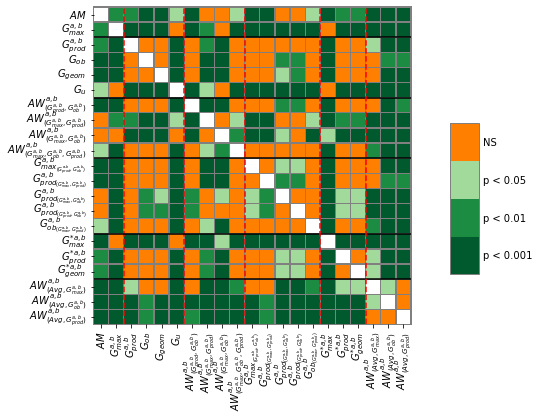

In [47]:
pc = sp.posthoc_conover(data_values_np)

plt.figure(figsize=(10, 7))
cmap = ['#FFFFFF', '#FF7F00', '#005A2E', '#1D8C43', '#A2DA9C']
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.65, 0.35, 0.04, 0.3], 'xticklabels': [row[0] for row in data_arch1], 'yticklabels': [row[0] for row in data_arch1]}

plt.gcf().subplots_adjust(left=-0.15, bottom=0.25)
heatmap, colorbar = sp.sign_plot(pc, **heatmap_args)

heatmap.axhline(y=2, color='black', linestyle='-', alpha=1)
heatmap.axvline(x=2, color='red', linestyle='--', alpha=1)
heatmap.axhline(y=6, color='black', linestyle='-', alpha=1)
heatmap.axvline(x=6, color='red', linestyle='--', alpha=1)
heatmap.axhline(y=10, color='black', linestyle='-', alpha=1)
heatmap.axvline(x=10, color='red', linestyle='--', alpha=1)
heatmap.axhline(y=15, color='black', linestyle='-', alpha=1)
heatmap.axvline(x=15, color='red', linestyle='--', alpha=1)
heatmap.axhline(y=18, color='black', linestyle='-', alpha=1)
heatmap.axvline(x=18, color='red', linestyle='--', alpha=1)
# Save the figure as pdf
plt.savefig(os.path.join(path_statistical_tests, 'model1.pdf'), format='pdf')

/home/iosu.rodriguez/anaconda3/envs/pytorch/lib/python3.9/site-packages/scipy/stats/_morestats.py:3145: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/iosu.rodriguez/anaconda3/envs/pytorch/lib/python3.9/site-packages/scipy/stats/_morestats.py:3159: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


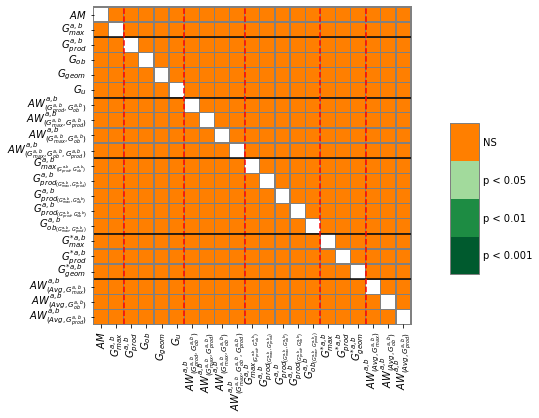

In [30]:
pc = sp.posthoc_wilcoxon(data_values_np)

plt.figure(figsize=(10, 7))
cmap = ['#FFFFFF', '#FF7F00', '#005A2E', '#1D8C43', '#A2DA9C']
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.65, 0.35, 0.04, 0.3], 'xticklabels': [row[0] for row in data_arch1], 'yticklabels': [row[0] for row in data_arch1]}

plt.gcf().subplots_adjust(left=-0.15, bottom=0.25)
heatmap, colorbar = sp.sign_plot(pc, **heatmap_args)

heatmap.axhline(y=2, color='black', linestyle='-', alpha=1)
heatmap.axvline(x=2, color='red', linestyle='--', alpha=1)
heatmap.axhline(y=6, color='black', linestyle='-', alpha=1)
heatmap.axvline(x=6, color='red', linestyle='--', alpha=1)
heatmap.axhline(y=10, color='black', linestyle='-', alpha=1)
heatmap.axvline(x=10, color='red', linestyle='--', alpha=1)
heatmap.axhline(y=15, color='black', linestyle='-', alpha=1)
heatmap.axvline(x=15, color='red', linestyle='--', alpha=1)
heatmap.axhline(y=18, color='black', linestyle='-', alpha=1)
heatmap.axvline(x=18, color='red', linestyle='--', alpha=1)
# Save the figure as pdf
plt.savefig(os.path.join(path_statistical_tests, 'model1_wilcoxon.pdf'), format='pdf')

## Architecture 2: Network in Network

In [31]:
data_arch2 = [
    [r'$AM$', 0.8584, 0.8661, 0.8602, 0.8633, 0.8643],
    [r'$G_{max}^{a,b}$', 0.8658, 0.8682, 0.8606, 0.8632, 0.8578],
    [r'$G_{prod}^{a,b}$', 0.8750, 0.8714, 0.8735, 0.8738, 0.8711],
    [r'$G_{ob}$', 0.8735, 0.8798, 0.8739, 0.8736, 0.8697],
    [r'$G_{geom}$', 0.8671, 0.8674, 0.8692, 0.8671, 0.8634],
    [r'$G_{u}$', 0.8613, 0.8646, 0.8656, 0.8587, 0.8665],
    # ['gp_prod_p_0_1', 0.8773, 0.8798, 0.8802, 0.8814, 0.8819],
    # ['gp_prod_p_0_5', 0.8723, 0.8794, 0.8783, 0.8829, 0.8755],
    
    [r'$AW_{(G_{prod}^{a, b}, G_{ob}^{a, b})}^{a, b}$', 0.8746, 0.8799, 0.8766, 0.8766, 0.8797],
    [r'$AW_{(G_{max}^{a, b}, G_{prod}^{a, b})}^{a, b}$', 0.8821, 0.8716, 0.8789, 0.8779, 0.8716],
    [r'$AW_{(G_{max}^{a, b}, G_{ob}^{a, b})}^{a, b}$', 0.873, 0.8719, 0.8682, 0.8691, 0.8698],
    [r'$AW_{(G_{max}^{a, b}, G_{ob}^{a, b}, G_{prod}^{a, b})}^{a, b}$', 0.8713, 0.8762, 0.8766, 0.8744, 0.8713],
    
    [r'$G_{max_{(G_{prod}^{a, b}, G_{ob}^{a, b})}}^{a, b}$', 0.88, 0.8735, 0.872, 0.8729, 0.8782],
    [r'$G_{prod_{(G_{max}^{a, b}, G_{prod}^{a, b})}}^{a, b}$', 0.8747, 0.8779, 0.8774, 0.875, 0.8728],
    [r'$G_{prod_{(G_{max}^{a, b}, G_{ob}^{a, b})}}^{a, b}$', 0.8733, 0.8785, 0.8762, 0.8698, 0.8754],
    [r'$G_{prod_{(G_{prod}^{a, b}, G_{ob}^{a, b})}}^{a, b}$', 0.8741, 0.874, 0.879, 0.8756, 0.8749],
    [r'$G_{ob_{(G_{max}^{a, b}, G_{prod}^{a, b})}}^{a, b}$', 0.8732, 0.877, 0.8754, 0.8728, 0.8741],

    [r'$G_{max}^{* a, b}$', 0.8701, 0.8722, 0.868, 0.8674, 0.8681],
    [r'$G_{prod}^{* a, b}$', 0.8796, 0.8838, 0.8825, 0.882, 0.8784],
    [r'$G_{geom}^{* a, b}$', 0.8757, 0.8774, 0.8784, 0.8757, 0.8799],

    [r'$AW_{(Avg, G_{max}^{a, b})}^{a, b}$', 0.8693, 0.8733, 0.8690, 0.8695, 0.8742],
    [r'$AW_{(Avg, G_{ob}^{a, b})}^{a, b}$', 0.8779, 0.8818, 0.8798, 0.8824, 0.8804],
    [r'$AW_{(Avg, G_{prod}^{a, b})}^{a, b}$', 0.8819, 0.8848, 0.8797, 0.8803, 0.8853],
]

data_values = [values[1:] for values in data_arch2]
df = pd.DataFrame(data=data_arch2, columns=['Model', 'Test1', 'Test2', 'Test3', 'Test4', 'Test5'])
df = df.set_index('Model')

We start by testing for normality in each population:

In [32]:
for pop in data_arch2:
    test_result = ss.shapiro(pop[1:])
    print('Shapiro test result for grouping {}: {}'.format(pop[0], test_result))
    if (test_result[1] > 0.05):
        print('We cannot discard that the previous population was sampled from a normal distribution')

Shapiro test result for grouping $AM$: ShapiroResult(statistic=0.9580554366111755, pvalue=0.7943816781044006)
We cannot discard that the previous population was sampled from a normal distribution
Shapiro test result for grouping $G_{max}^{a,b}$: ShapiroResult(statistic=0.9860615730285645, pvalue=0.9641755223274231)
We cannot discard that the previous population was sampled from a normal distribution
Shapiro test result for grouping $G_{prod}^{a,b}$: ShapiroResult(statistic=0.9100196361541748, pvalue=0.4677083194255829)
We cannot discard that the previous population was sampled from a normal distribution
Shapiro test result for grouping $G_{ob}$: ShapiroResult(statistic=0.8831984996795654, pvalue=0.32405728101730347)
We cannot discard that the previous population was sampled from a normal distribution
Shapiro test result for grouping $G_{geom}$: ShapiroResult(statistic=0.8639872074127197, pvalue=0.24292078614234924)
We cannot discard that the previous population was sampled from a norma

All populations seem to be normal, so we apply statistical tests that allow for normality. We now will perform ANOVA testing in all populations to check if there are statistical differences among them:

<font color='red'>Warning</font>: Populations are very small (n = 5, n < 20), so populations may not really be normal. Further experimenting could be necessary.

In [33]:
test_result = ss.f_oneway(*data_values, axis=0)
print(test_result)

F_onewayResult(statistic=21.707660733515024, pvalue=4.189921015131788e-25)


The p-value obtained is well beyond the imposed threshold of 0.05, so we can safely discard the null hypothesis that all populations are equal (and thus, there must be some model whose accuracies are statistically better or worse than those of the rest). 

We now need to find out which models are statistically different via post-hoc tests between each pair of tests.

In [34]:
data_values_np = np.array(data_values)
sp.posthoc_anderson(data_values_np)

/home/iosu.rodriguez/anaconda3/envs/pytorch/lib/python3.9/site-packages/scikit_posthocs/_posthocs.py:1214: UserWarning: p-value capped: true value larger than 0.25
  vs[i, j] = ss.anderson_ksamp([x.loc[x[_group_col] == groups[i], _val_col], x.loc[x[_group_col] == groups[j], _val_col]], midrank=midrank)[2]


,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
1,1.000000,0.250000,0.004356,0.004356,0.017740,0.250000,0.003715,0.003572,0.004356,0.003572,...,0.004356,0.004356,0.004356,0.004356,0.004356,0.004356,0.003572,0.004356,0.004356,0.004356
2,0.250000,1.000000,0.004356,0.004356,0.116989,0.250000,0.003715,0.003572,0.005658,0.003572,...,0.004356,0.004356,0.004356,0.004356,0.037320,0.004356,0.003572,0.004356,0.004356,0.004356
3,0.004356,0.004356,1.000000,0.250000,0.003769,0.004356,0.008781,0.173200,0.070584,0.250000,...,0.102649,0.250000,0.037320,0.250000,0.021065,0.004356,0.003572,0.200097,0.004356,0.004356
4,0.004356,0.004356,0.250000,1.000000,0.003769,0.004356,0.054596,0.250000,0.037320,0.250000,...,0.250000,0.250000,0.056741,0.250000,0.021065,0.021065,0.051813,0.121731,0.013420,0.010368
5,0.017740,0.116989,0.003769,0.003769,1.000000,0.031294,0.003218,0.003095,0.018018,0.003095,...,0.003769,0.003769,0.003769,0.003769,0.041709,0.003769,0.003095,0.008914,0.003769,0.003769
6,0.250000,0.250000,0.004356,0.004356,0.031294,1.000000,0.003715,0.003572,0.004356,0.003572,...,0.004356,0.004356,0.004356,0.004356,0.004356,0.004356,0.003572,0.004356,0.004356,0.004356
7,0.003715,0.003715,0.008781,0.054596,0.003218,0.003715,1.000000,0.250000,0.003715,0.025232,...,0.250000,0.138963,0.138963,0.076000,0.003715,0.059879,0.250000,0.003715,0.037278,0.011516
8,0.003572,0.003572,0.173200,0.250000,0.003095,0.003572,0.250000,1.000000,0.069525,0.137062,...,0.172738,0.250000,0.250000,0.132286,0.019308,0.062981,0.250000,0.069525,0.125780,0.029950
9,0.004356,0.005658,0.070584,0.037320,0.018018,0.004356,0.003715,0.069525,1.000000,0.069525,...,0.010368,0.026977,0.004356,0.010368,0.250000,0.004356,0.003572,0.250000,0.004356,0.004356
10,0.003572,0.003572,0.250000,0.250000,0.003095,0.003572,0.025232,0.137062,0.069525,1.000000,...,0.245070,0.250000,0.250000,0.250000,0.019308,0.003571,0.055472,0.069525,0.003571,0.003571


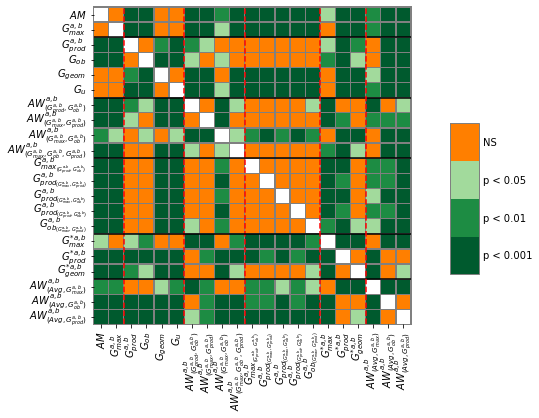

In [35]:
pc = sp.posthoc_conover(data_values_np)

plt.figure(figsize=(10, 7))
cmap = ['#FFFFFF', '#FF7F00', '#005A2E', '#1D8C43', '#A2DA9C']
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.65, 0.35, 0.04, 0.3], 'xticklabels': [row[0] for row in data_arch2], 'yticklabels': [row[0] for row in data_arch2]}

plt.gcf().subplots_adjust(left=-0.15, bottom=0.25)
heatmap, colorbar = sp.sign_plot(pc, **heatmap_args)

heatmap.axhline(y=2, color='black', linestyle='-', alpha=1)
heatmap.axvline(x=2, color='red', linestyle='--', alpha=1)
heatmap.axhline(y=6, color='black', linestyle='-', alpha=1)
heatmap.axvline(x=6, color='red', linestyle='--', alpha=1)
heatmap.axhline(y=10, color='black', linestyle='-', alpha=1)
heatmap.axvline(x=10, color='red', linestyle='--', alpha=1)
heatmap.axhline(y=15, color='black', linestyle='-', alpha=1)
heatmap.axvline(x=15, color='red', linestyle='--', alpha=1)
heatmap.axhline(y=18, color='black', linestyle='-', alpha=1)
heatmap.axvline(x=18, color='red', linestyle='--', alpha=1)
# Save the figure as pdf
plt.savefig(os.path.join(path_statistical_tests, 'model2.pdf'), format='pdf')

/home/iosu.rodriguez/anaconda3/envs/pytorch/lib/python3.9/site-packages/scipy/stats/_morestats.py:3145: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/iosu.rodriguez/anaconda3/envs/pytorch/lib/python3.9/site-packages/scipy/stats/_morestats.py:3159: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


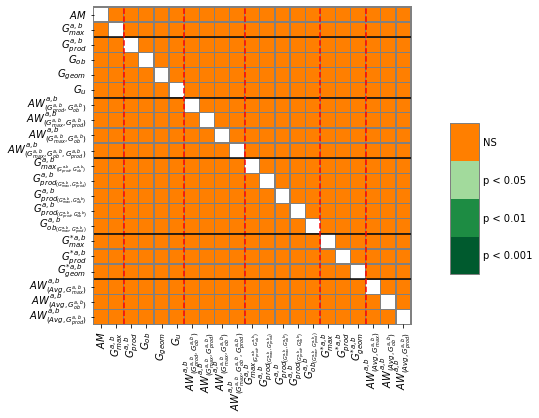

In [37]:
pc = sp.posthoc_wilcoxon(data_values_np)

plt.figure(figsize=(10, 7))
cmap = ['#FFFFFF', '#FF7F00', '#005A2E', '#1D8C43', '#A2DA9C']
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.65, 0.35, 0.04, 0.3], 'xticklabels': [row[0] for row in data_arch1], 'yticklabels': [row[0] for row in data_arch1]}

plt.gcf().subplots_adjust(left=-0.15, bottom=0.25)
heatmap, colorbar = sp.sign_plot(pc, **heatmap_args)

heatmap.axhline(y=2, color='black', linestyle='-', alpha=1)
heatmap.axvline(x=2, color='red', linestyle='--', alpha=1)
heatmap.axhline(y=6, color='black', linestyle='-', alpha=1)
heatmap.axvline(x=6, color='red', linestyle='--', alpha=1)
heatmap.axhline(y=10, color='black', linestyle='-', alpha=1)
heatmap.axvline(x=10, color='red', linestyle='--', alpha=1)
heatmap.axhline(y=15, color='black', linestyle='-', alpha=1)
heatmap.axvline(x=15, color='red', linestyle='--', alpha=1)
heatmap.axhline(y=18, color='black', linestyle='-', alpha=1)
heatmap.axvline(x=18, color='red', linestyle='--', alpha=1)
# Save the figure as pdf
plt.savefig(os.path.join(path_statistical_tests, 'model2_wilcoxon.pdf'), format='pdf')

## Architecture 3: VGG (Small version)

In [18]:
data_arch3 = [
    [r'$AM$', 0.8737, 0.8771, 0.8733, 0.8694, 0.8732],
    [r'$G_{max}^{a,b}$', 0.8597, 0.8655, 0.87, 0.857, 0.8644],
    [r'$G_{prod}^{a,b}$', 0.8687, 0.866, 0.8559, 0.8678, 0.867],
    [r'$G_{ob}$', 0.8741, 0.8736, 0.8676, 0.8685, 0.8775],
    [r'$G_{geom}$', 0.8681, 0.8775, 0.87, 0.8702, 0.8768],
    [r'$G_{u}$', 0.8646, 0.8672, 0.8669, 0.867, 0.8672],
    
    [r'$AW_{(G_{prod}^{a, b}, G_{ob}^{a, b})}^{a, b}$', 0.1, 0.8725, 0.8764, 0.8774, 0.8604],
    [r'$AW_{(G_{max}^{a, b}, G_{prod}^{a, b})}^{a, b}$', 0.8711, 0.8726, 0.8733, 0.8699, 0.872],
    [r'$AW_{(G_{max}^{a, b}, G_{ob}^{a, b})}^{a, b}$', 0.8702, 0.8668, 0.8727, 0.8686, 0.8668],
    [r'$AW_{(G_{max}^{a, b}, G_{ob}^{a, b}, G_{prod}^{a, b})}^{a, b}$', 0.8745, 0.8746, 0.8644, 0.8722, 0.8724],
    
    [r'$G_{max_{(G_{prod}^{a, b}, G_{ob}^{a, b})}}^{a, b}$', 0.8707, 0.8689, 0.8729, 0.1, 0.8717],
    [r'$G_{prod_{(G_{max}^{a, b}, G_{prod}^{a, b})}}^{a, b}$', 0.8663, 0.8662, 0.1, 0.1, 0.1],
    [r'$G_{prod_{(G_{max}^{a, b}, G_{ob}^{a, b})}}^{a, b}$', 0.1, 0.1, 0.1, 0.1, 0.8675],
    [r'$G_{prod_{(G_{prod}^{a, b}, G_{ob}^{a, b})}}^{a, b}$', 0.1, 0.1, 0.1, 0.8719, 0.1],
    [r'$G_{ob_{(G_{max}^{a, b}, G_{prod}^{a, b})}}^{a, b}$', 0.1, 0.8709, 0.8722, 0.868, 0.8706],

    [r'$G_{max}^{* a, b}$', 0.856, 0.8566, 0.8602, 0.8542, 0.8576],
    [r'$G_{prod}^{* a, b}$', 0.8647, 0.8687, 0.8715, 0.8696, 0.8632],
    [r'$G_{geom}^{* a, b}$', 0.8751, 0.8744, 0.8736, 0.8735, 0.8726],

    [r'$AW_{(Avg, G_{max}^{a, b})}^{a, b}$', 0.869, 0.8711, 0.8676, 0.8671, 0.8695],
    [r'$AW_{(Avg, G_{ob}^{a, b})}^{a, b}$', 0.8763, 0.8723, 0.8683, 0.8741, 0.8765],
    [r'$AW_{(Avg, G_{prod}^{a, b})}^{a, b}$', 0.8763, 0.8717, 0.8729, 0.872, 0.8769],
]

data_values = [values[1:] for values in data_arch3]
df = pd.DataFrame(data=data_arch3, columns=['Model', 'Test1', 'Test2', 'Test3', 'Test4', 'Test5'])
df = df.set_index('Model')
df

,Test1,Test2,Test3,Test4,Test5
Model,,,,,
$AM$,0.8737,0.8771,0.8733,0.8694,0.8732
"$G_{max}^{a,b}$",0.8597,0.8655,0.8700,0.8570,0.8644
"$G_{prod}^{a,b}$",0.8687,0.8660,0.8559,0.8678,0.8670
$G_{ob}$,0.8741,0.8736,0.8676,0.8685,0.8775
$G_{geom}$,0.8681,0.8775,0.8700,0.8702,0.8768
$G_{u}$,0.8646,0.8672,0.8669,0.8670,0.8672
"$AW_{(G_{prod}^{a, b}, G_{ob}^{a, b})}^{a, b}$",0.1000,0.8725,0.8764,0.8774,0.8604
"$AW_{(G_{max}^{a, b}, G_{prod}^{a, b})}^{a, b}$",0.8711,0.8726,0.8733,0.8699,0.8720
"$AW_{(G_{max}^{a, b}, G_{ob}^{a, b})}^{a, b}$",0.8702,0.8668,0.8727,0.8686,0.8668


ANOVA test: Check if all populations are equal among themselves:

In [19]:
test_result = ss.f_oneway(*data_values, axis=0)
print(test_result)

F_onewayResult(statistic=5.60018942442355, pvalue=8.18165450082472e-09)


Anderson posthoc: Check differences among populations:

In [20]:
data_values_np = np.array(data_values)
sp.posthoc_anderson(data_values_np)



/home/iosu.rodriguez/anaconda3/envs/pytorch/lib/python3.9/site-packages/scikit_posthocs/_posthocs.py:1214: UserWarning: p-value capped: true value larger than 0.25
  vs[i, j] = ss.anderson_ksamp([x.loc[x[_group_col] == groups[i], _val_col], x.loc[x[_group_col] == groups[j], _val_col]], midrank=midrank)[2]
/home/iosu.rodriguez/anaconda3/envs/pytorch/lib/python3.9/site-packages/scikit_posthocs/_posthocs.py:1214: UserWarning: p-value floored: true value smaller than 0.001
  vs[i, j] = ss.anderson_ksamp([x.loc[x[_group_col] == groups[i], _val_col], x.loc[x[_group_col] == groups[j], _val_col]], midrank=midrank)[2]


,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
1,1.000000,0.010368,0.004356,0.250000,0.250000,0.003572,0.250000,0.158821,0.016997,0.250000,...,0.002248,0.001000,0.002108,0.037320,0.004356,0.021065,0.250000,0.021065,0.250000,0.250000
2,0.010368,1.000000,0.250000,0.021065,0.013420,0.128552,0.250000,0.010368,0.034133,0.026977,...,0.118077,0.010133,0.010133,0.121731,0.043801,0.250000,0.004356,0.056741,0.010368,0.004356
3,0.004356,0.250000,1.000000,0.043801,0.010368,0.250000,0.250000,0.004356,0.250000,0.056741,...,0.033252,0.006875,0.010133,0.121731,0.056741,0.250000,0.004356,0.070584,0.010368,0.004356
4,0.250000,0.021065,0.043801,1.000000,0.250000,0.003572,0.250000,0.167111,0.132286,0.250000,...,0.002248,0.001000,0.004052,0.250000,0.004356,0.167111,0.250000,0.213559,0.250000,0.250000
5,0.250000,0.013420,0.010368,0.250000,1.000000,0.003572,0.250000,0.250000,0.218538,0.250000,...,0.002248,0.001000,0.006875,0.250000,0.004356,0.144634,0.167111,0.144634,0.250000,0.250000
6,0.003572,0.128552,0.250000,0.003572,0.003572,1.000000,0.164518,0.003572,0.250000,0.051813,...,0.008378,0.010642,0.010642,0.051813,0.003571,0.250000,0.003572,0.019308,0.003572,0.003572
7,0.250000,0.250000,0.250000,0.250000,0.250000,0.164518,1.000000,0.250000,0.250000,0.250000,...,0.114447,0.023054,0.023054,0.250000,0.056741,0.167111,0.167111,0.167111,0.250000,0.250000
8,0.158821,0.010368,0.004356,0.167111,0.250000,0.003572,0.250000,1.000000,0.096635,0.250000,...,0.002248,0.001000,0.004052,0.144634,0.004356,0.021065,0.013420,0.013420,0.200097,0.250000
9,0.016997,0.034133,0.250000,0.132286,0.218538,0.250000,0.250000,0.096635,1.000000,0.237994,...,0.001856,0.003739,0.009315,0.250000,0.003572,0.250000,0.008424,0.250000,0.062981,0.016997
10,0.250000,0.026977,0.056741,0.250000,0.250000,0.051813,0.250000,0.250000,0.237994,1.000000,...,0.010311,0.002108,0.002108,0.074927,0.004356,0.056741,0.250000,0.056741,0.250000,0.250000


Plot statistical significance:

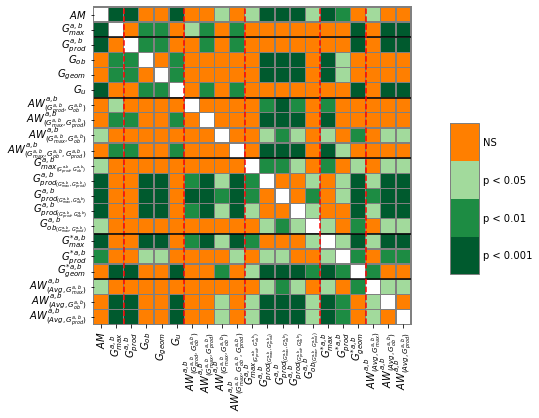

In [21]:
pc = sp.posthoc_conover(data_values_np)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
cmap = ['#FFFFFF', '#FF7F00', '#005A2E', '#1D8C43', '#A2DA9C']
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.65, 0.35, 0.04, 0.3], 'xticklabels': [row[0] for row in data_arch3], 'yticklabels': [row[0] for row in data_arch3]}

plt.gcf().subplots_adjust(left=-0.15, bottom=0.25)
heatmap, colorbar = sp.sign_plot(pc, **heatmap_args)

heatmap.axhline(y=2, color='black', linestyle='-', alpha=1)
heatmap.axvline(x=2, color='red', linestyle='--', alpha=1)
heatmap.axhline(y=6, color='black', linestyle='-', alpha=1)
heatmap.axvline(x=6, color='red', linestyle='--', alpha=1)
heatmap.axhline(y=10, color='black', linestyle='-', alpha=1)
heatmap.axvline(x=10, color='red', linestyle='--', alpha=1)
heatmap.axhline(y=15, color='black', linestyle='-', alpha=1)
heatmap.axvline(x=15, color='red', linestyle='--', alpha=1)
heatmap.axhline(y=18, color='black', linestyle='-', alpha=1)
heatmap.axvline(x=18, color='red', linestyle='--', alpha=1)


# Save the figure as pdf
plt.savefig(os.path.join(path_statistical_tests, 'model3.pdf'), format='pdf')